In [1]:
from bitarray import bitarray
from hashlib import sha3_256,sha256, blake2b
from string import ascii_letters,ascii_lowercase
import matplotlib.pyplot as plt
import numpy as np
import json

class bloom_filter:
    '''
    initialization: input bloom filter size and the number of hash functions.
    add():insert words in the filter
    check():determine whether the word is in the filter
    '''
    def __init__(self,size,hash_k=3) -> None:
        self.size=int(size)
        self.hash_k=int(hash_k)
        self.__data=bitarray(self.size)
        self.__hash_list=[self.__my_hash1,self.__my_hash2,self.__my_hash3][:self.hash_k]

        self.__data.setall(0)

    def __my_hash1(self,s):
        return int( sha256(s. lower() .encode()). hexdigest(), 16) % self.size
    def __my_hash2(self,s):
        return int( blake2b(s. lower() .encode()). hexdigest(), 16) % self.size
    def __my_hash3(self,s):
        return int( sha3_256(s. lower() .encode()). hexdigest(), 16) % self.size

    def add(self,word):
        p=[hash_func(word) for hash_func in self.__hash_list]
        for i in p:
            self.__data[i]=1

    def check(self,word):
        p=[hash_func(word) for hash_func in self.__hash_list]
        in_bf=0
        for i in p:
            if self.__data[i]==1:
                in_bf+=1
        if in_bf==self.hash_k:
            return True
        else:
            return False

    def show(self):
        print(self.__data)

In [15]:
size=1e7
hash_k=3
bf3=bloom_filter(size,hash_k)
with open(r'words.txt') as f:
    for line in f:
        word=line.strip()
        bf3.add(word)
inword=['2','1080','&c','10-point'] #This is the top4 words in the words.txt
for item in inword:
    print(bf3.check(item))
#This is my name and it is not in the words.txt
print(bf3.check('Heyuan'))

True
True
True
True
False


In [2]:
def spelling_correction(bf,word):
    '''return word suggestions'''
    words_possible=[]
    if bf.check(word):
        words_possible.append(word)
    for letter in range(len(word)):
        front=word[:letter]
        later=word[letter+1:]
        words_substitu=[f'{front}{i}{later}' for i in ascii_lowercase.replace(word[letter],'')]
        for w in words_substitu:
            if bf.check(w):
                words_possible.append(w)
    return words_possible

In [23]:
for hash_k in [1,2,3]:
    bf=bloom_filter(size,hash_k)
    with open(r'words.txt') as f:
        for line in f:
            word=line.strip()
            bf.add(word)
    print('Whether the filter contains floeer:',bf.check('floeer'))
    print('suggestions using the %s hash function:'%['first','first and second','all'][hash_k-1])
    words_possible=spelling_correction(bf,'floeer')
    print(words_possible)

Whether the filter contains floeer: False
suggestions using the first hash function:
['bloeer', 'qloeer', 'fyoeer', 'flofer', 'floter', 'flower', 'floeqr', 'floees']
Whether the filter contains floeer: False
suggestions using the first and second hash function:
['fyoeer', 'floter', 'flower']
Whether the filter contains floeer: False
suggestions using the all hash function:
['floter', 'flower']


In [16]:
with open(r'typos.json') as f:
    data=json.loads(f.read())
bf=bloom_filter(1e7,1)
with open(r'words.txt') as f:
    for line in f:
        word=line.strip()
        bf.add(word)

good_suggestion=0
misidentified=0
for pair in data:
    suggest_words=spelling_correction(bf,pair[0])
    if pair[1] in suggest_words:
        misidentified+=(1-1/len(suggest_words))
        if len(suggest_words)<4:
            good_suggestion+=1
    # break

good_rate=good_suggestion/len(data)
print('good_rate',good_rate*100)
mis_rate=misidentified/len(data)
print('mis_rate',mis_rate*100)


0.33


k=3
n=[1e2,1e3,1e4,1e5, 1e6,1e7,1e8,1e9,1e10]
good_rate=[0.0,0.0,0.0,0.0,0.0,84.538,88.966,88.966,88.966]
[n=1e2,rate=0.0;n=1e3,rate=0.0 ;n=1e4, rate=0.0 ;n=1e5, rate=0.0 ; n=1e6, rate=0.0 ; n=1e7,rate=84.538;n=1e8,rate=88.966; n=1e9,rate=88.966; n= 1e10,rate=88.966]

k=2
n=[1e2,1e3,1e4,1e5, 1e6,1e7,1e8,1e9,1e10]
good_rate=[0.0, 0.0, 0.0, 0.0, 0.0 ,54.732,88.884,88.964,88.966]
[n=1e2,rate=0.0;n=1e3,rate=0.0 ;n=1e4, rate=0.0 ;n=1e5, rate=0.0 ; n=1e6, rate=0.0 ; n=1e7,rate=54.732 ;n=1e8,rate=88.884; n=1e9,rate=88.964; n= 1e10,rate=88.966]

k=1
n=[1e2,1e3,1e4,1e5, 1e6,1e7,1e8,1e9,1e10]
good_rate=[0.0, 0.0, 0.0, 0.0, 0.0 ,0.33,73.412,88.408,88.91]
[n=1e2,rate=0.0;n=1e3,rate=0.0 ;n=1e4, rate=0.0 ;n=1e5, rate=0.0 ; n=1e6, rate=0.0 ; n=1e7,rate=0.33 ;n=1e8,rate=73.412; n=1e9,rate=88.408; n= 1e10,rate=88.91]

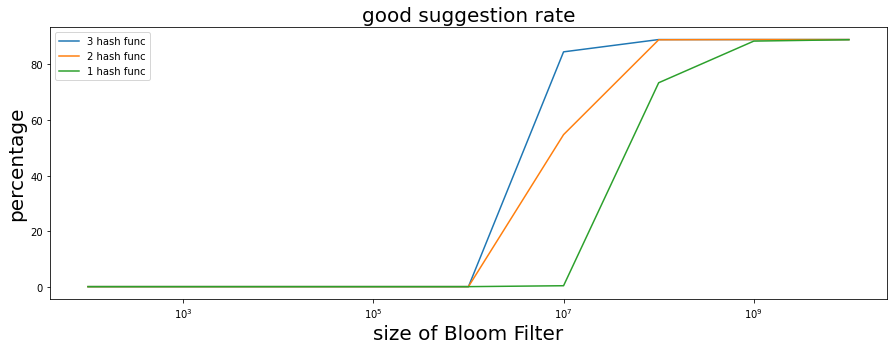

In [28]:
n=[1e2,1e3,1e4,1e5, 1e6,1e7,1e8,1e9,1e10]
good_rate3=[0.0,0.0,0.0,0.0,0.0,84.538,88.966,88.966,88.966]
good_rate2=[0.0, 0.0, 0.0, 0.0, 0.0 ,54.732,88.884,88.964,88.966]
good_rate1=[0.0, 0.0, 0.0, 0.0, 0.0 ,0.33,73.412,88.408,88.91]
plt.figure(figsize=(15,5))
plt.axes(xscale='log')
plt.xlabel('size of Bloom Filter',fontsize=20)
plt.ylabel('percentage',fontsize=20)
plt.plot(n, good_rate3, label='3 hash func')
plt.plot(n, good_rate2,label='2 hash func')
plt.plot(n, good_rate1,label='1 hash func')
plt.title('good suggestion rate',fontsize=20)
plt.legend()
plt.savefig('bloomsize.jpg')
plt.show()

In [ ]:
'''plot good_rate and mis_rate in one plot'''
with open(r'typos.json') as f:
    data=json.loads(f.read())

N=np.logspace(2,10,9)
plt.axes(xscale='log')
plt.xlabel('size of Bloom Filter')
plt.ylabel('percentage')
good_rate_N_k=[]
for hash_k in [1,2,3]:
    good_rate_N=[]
    mis_rate_N=[]
    for size in N:
        bf=bloom_filter(size,hash_k)
        with open(r'words.txt') as f:
            for line in f:
                word=line.strip()
                bf.add(word)
        good_suggestion=0
        misidentified=0
        for pair in data:
            suggest_words=spelling_correction(bf,pair[0])
            if pair[1] in suggest_words:
                misidentified+=(1-1/len(suggest_words))
                if len(suggest_words)<4:
                    good_suggestion+=1
            # break
        good_rate=good_suggestion/len(data)
        mis_rate=misidentified/len(data)
        good_rate_N.append(good_rate*100)
        mis_rate_N.append(mis_rate*100)
    plt.plot(N, good_rate_N, label='%d hashes good'%hash_k)
    plt.plot(N, mis_rate_N,label='%d hashes misidentified'%hash_k)
    good_rate_N_k.append(good_rate_N)
plt.legend()
plt.savefig('bloomsize_good_mis.jpg')
plt.show()
# print(good_rate_N_k)
# print(mis_rate_N)